In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as sp
%load_ext google.cloud.bigquery
import pickle
from matplotlib import pyplot as plt
from datetime import datetime
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

In [3]:
df = pd.read_csv('ZEV_compliance_tracker.csv', index_col=0)

In [4]:
# fig, ax = plt.subplots()

# dfa.plot(x='make', y=[
#     'ZEV Surplus', 
#     'ZEV Surplus after CO2', 
#     # 'ZEV Surplus after CO2 - Proposed'
# ], kind='barh', ax=ax, figsize=(10, 10))
# ax.set_xlabel('ZEV Credit Surplus/Shortfall')
# ax.set_ylabel('')

# ax.set_title('ZEV Mandate: Sales vs Year 1 Target as of {}'.format(last_month))

# plt.savefig('plots/top_20_last_12_months_{}.png'.format(this_month), transparent=False, bbox_inches='tight', dpi=300, facecolor='white')
# plt.show()

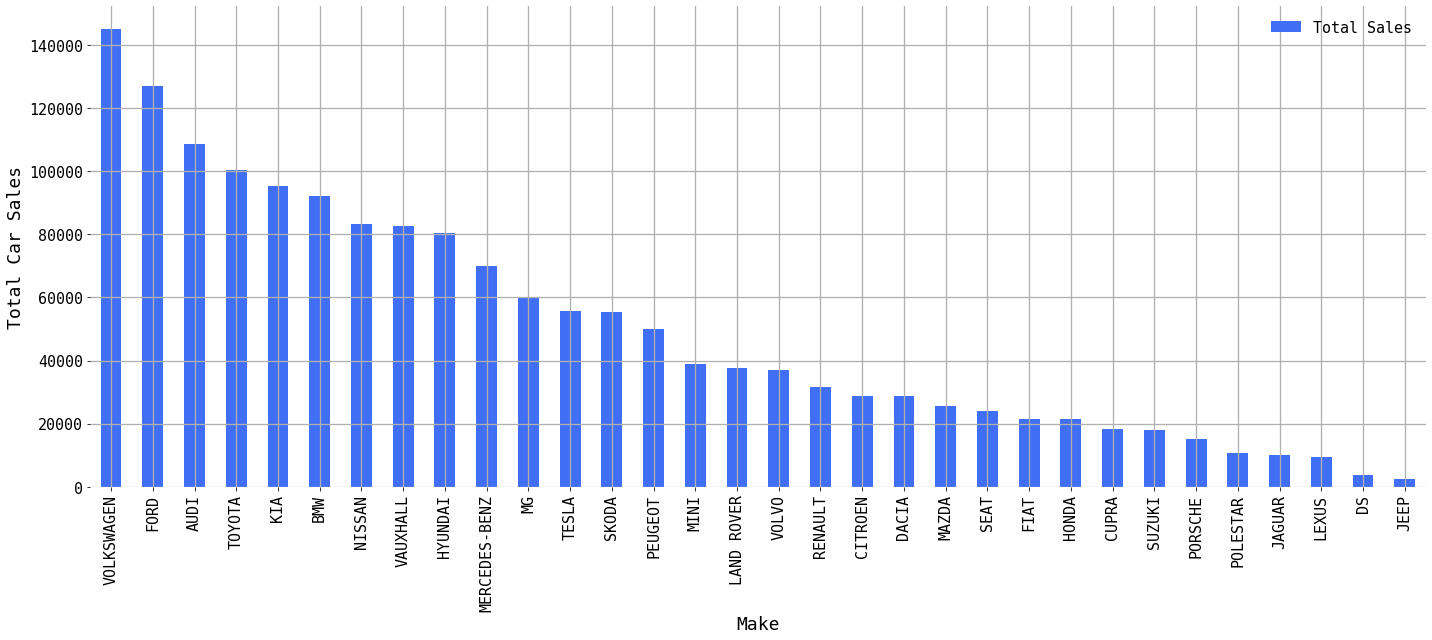

In [5]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Total Sales', kind='bar', ax=ax)

ax.set_ylabel('Total Car Sales')

plt.savefig('plots/how_s1_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')


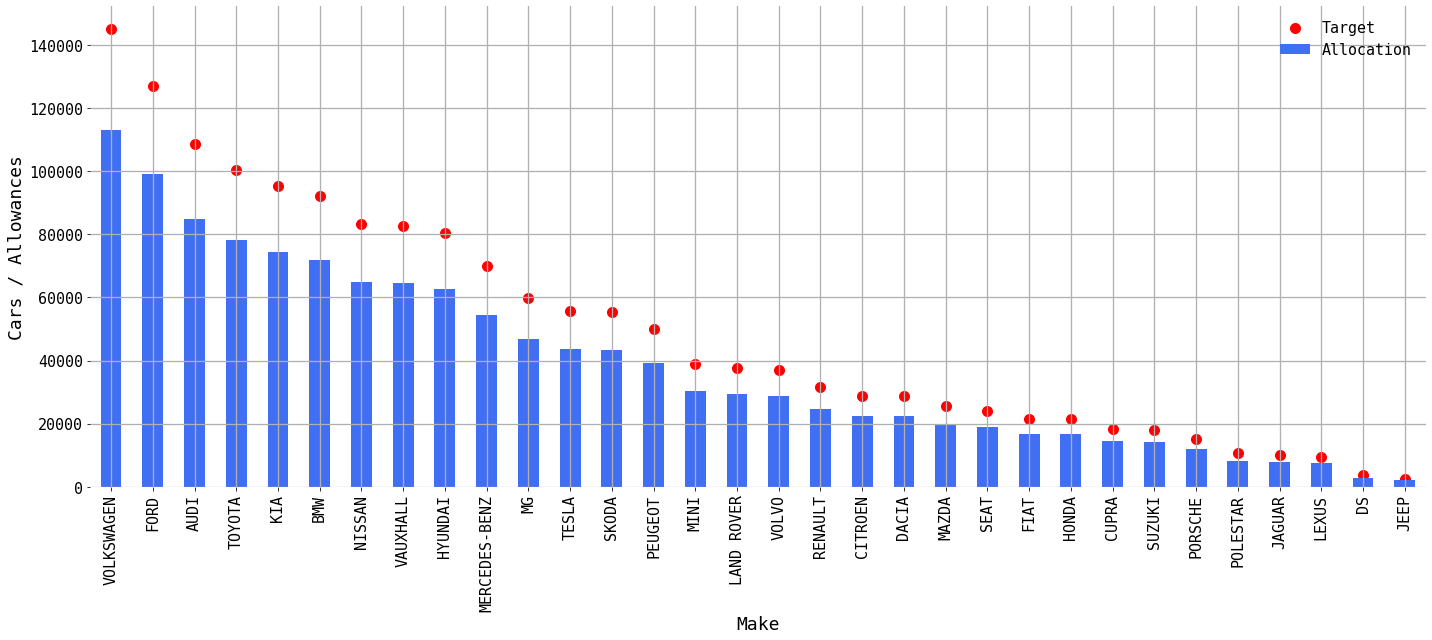

In [6]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y='Allocated allowances', kind='bar', ax=ax, label='Allocated Allowances')
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s2_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

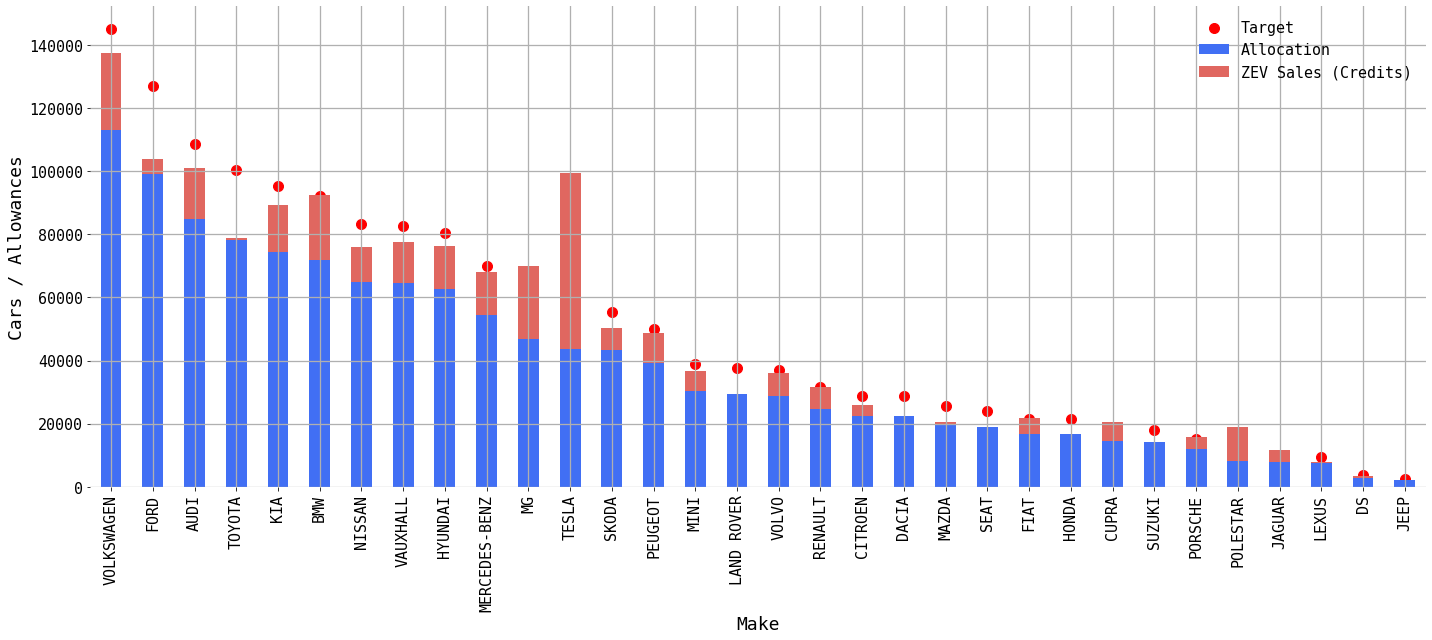

In [7]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s3_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [8]:
df['ZEV Credits available from CO2'] = df['Allowance Surplus (after CO2 transfers)'] - df['Allowance Surplus']
df

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2
31,VOLKSWAGEN,144926,120472,24454,139.81,133.73,113042.28,-7429.72,-4916.52,2513.20
30,FORD,126924,122237,4687,127.00,126.15,99000.72,-23236.28,-22879.69,356.59
29,AUDI,108657,92414,16243,142.01,146.83,84752.46,-7661.54,-7661.54,0.00
28,TOYOTA,100255,99604,651,110.47,108.28,78198.90,-21405.10,-20655.31,749.79
27,KIA,95261,80373,14888,135.70,122.87,74303.58,-6069.42,-2532.82,3536.60
26,BMW,92108,71456,20652,130.09,134.39,71844.24,388.24,388.24,0.00
25,NISSAN,83240,72142,11098,142.63,134.73,64927.20,-7214.80,-5258.79,1956.01
24,VAUXHALL,82714,69603,13110,127.64,125.19,64516.92,-5086.08,-4502.43,583.65
23,HYUNDAI,80268,66691,13577,127.24,122.46,62609.04,-4081.96,-2988.22,1093.74
22,MERCEDES-BENZ,69903,56541,13362,137.09,146.22,54524.34,-2016.66,-2016.66,0.00


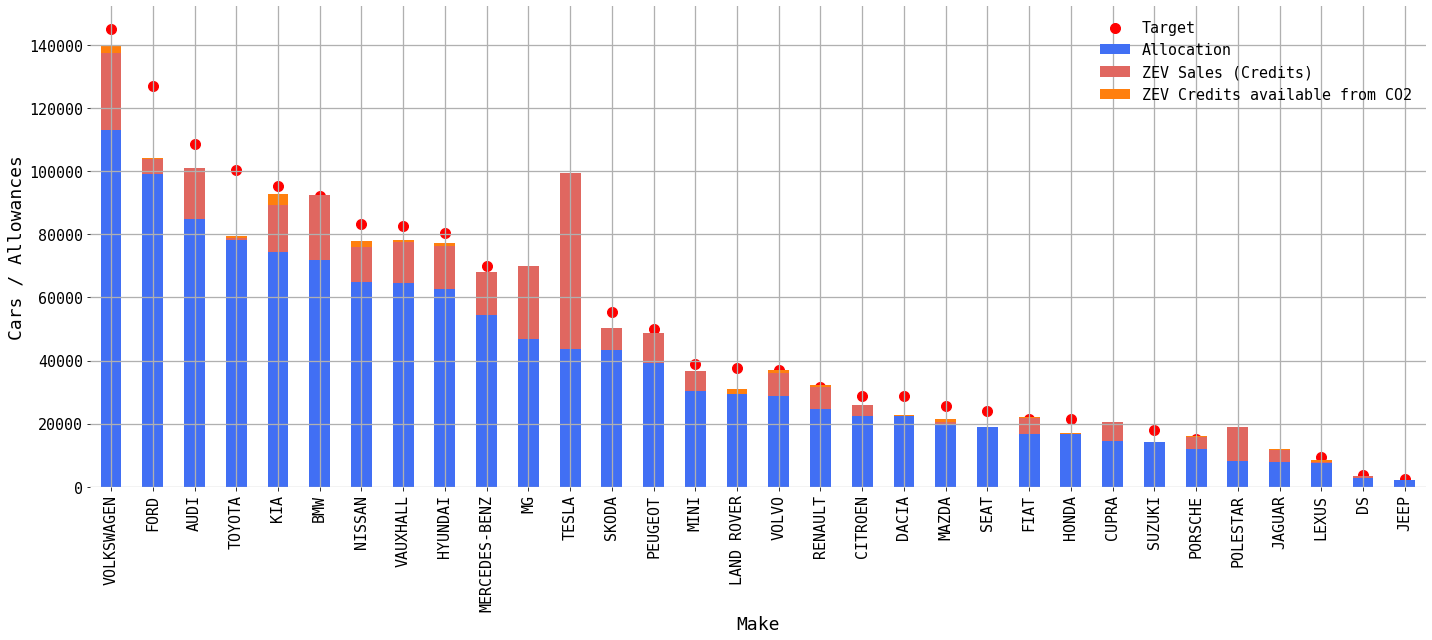

In [9]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(x='Make', y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], kind='bar', ax=ax, label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales (Credits)', 'ZEV Credits available from CO2'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s4_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

## Trading

In [10]:
allowances_for_sale = df[df['Allowance Surplus (after CO2 transfers)']>0]['Allowance Surplus (after CO2 transfers)'].sum()
allowances_needed = df[df['Allowance Surplus (after CO2 transfers)']<0]['Allowance Surplus (after CO2 transfers)'].sum()

In [11]:
market_deficit_percentage = allowances_for_sale / (-1*allowances_needed)

In [12]:
df['Credit Sales'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: (-1*x) if x>0 else 0)

df['Credit Purchases'] = df['Allowance Surplus (after CO2 transfers)'].apply(lambda x: market_deficit_percentage * (-1*x) if x<0 else 0)
df['Credits Used for Compliance'] = df.apply(lambda row: row['ZEV Sales'] if row['Allowance Surplus (after CO2 transfers)'] < 0 else row['Total Sales'] - row['Allocated allowances'], axis=1)

In [13]:
df['Credit Sales'].sum()

-68155.1

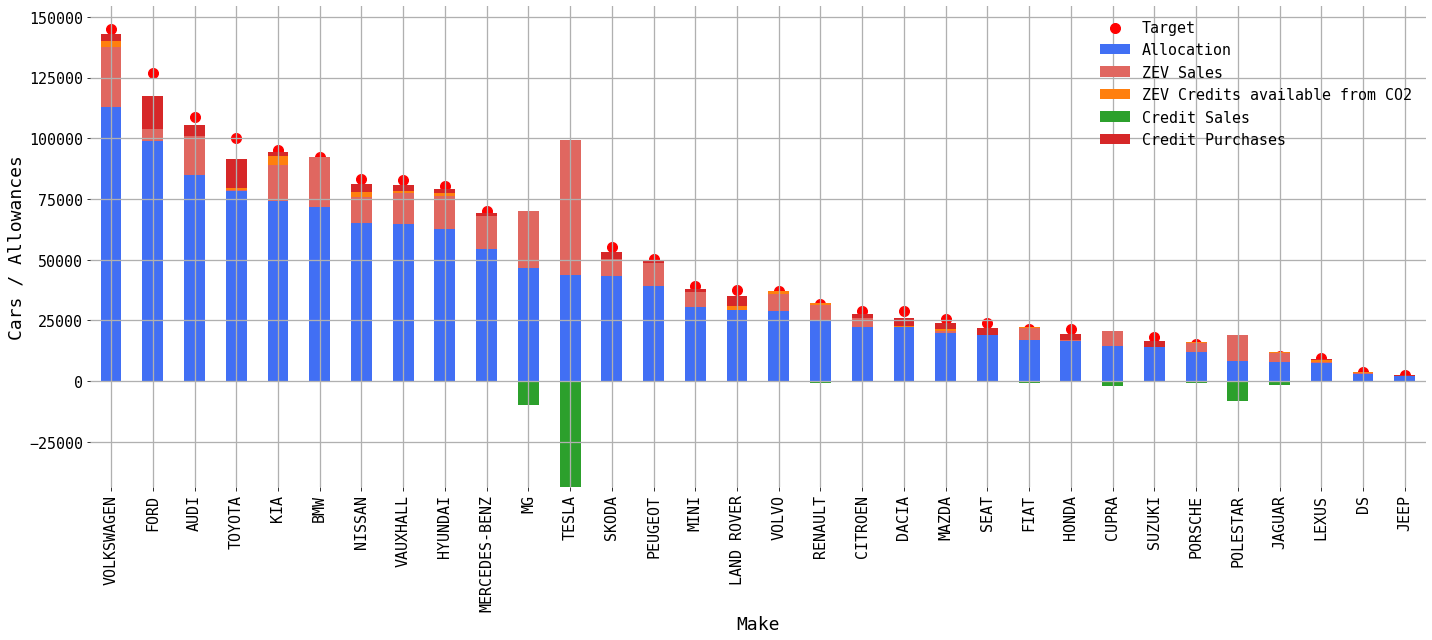

In [14]:
fig, ax = plt.subplots(figsize=(20, 9))

df.plot(
    x='Make', 
    y=['Allocated allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], 
    kind='bar', 
    ax=ax, 
    label=['Allocated Allowances', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], stacked=True)
df.plot(x='Make', y='Total Sales', kind='scatter', ax=ax, label='Target', s=100, c='r')

ax.legend(['Target', 'Allocation', 'ZEV Sales', 'ZEV Credits available from CO2', 'Credit Sales', 'Credit Purchases'], loc='upper right', )

ax.set_ylabel('Cars / Allowances')
ax.set_xticklabels(df.Make.tolist(), rotation = 90)

plt.savefig('plots/how_s5_van.png', transparent=False, bbox_inches='tight', dpi=300, facecolor='white')

In [15]:
df['Allowance Surplus after Trading'] = df.apply(lambda row: row['Credit Purchases'] + row['Allowance Surplus (after CO2 transfers)'] + row['Credit Sales'], axis=1)

In [16]:
df['Borrowable'] = df.apply(lambda row: row['Total Sales'] *.16, axis=1)

In [17]:
df.sort_values('Allowance Surplus after Trading')

,Make,Total Sales,Non-ZEV Sales,ZEV Sales,CO2 Target,CO2 Performance,Allocated allowances,Allowance Surplus,Allowance Surplus (after CO2 transfers),ZEV Credits available from CO2,Credit Sales,Credit Purchases,Credits Used for Compliance,Allowance Surplus after Trading,Borrowable
30,FORD,126924,122237,4687,127.00,126.15,99000.72,-23236.28,-22879.69,356.59,0.00,13348.229721,4687.00,-9531.460279,20307.84
28,TOYOTA,100255,99604,651,110.47,108.28,78198.90,-21405.10,-20655.31,749.79,0.00,12050.505179,651.00,-8604.804821,16040.80
29,AUDI,108657,92414,16243,142.01,146.83,84752.46,-7661.54,-7661.54,0.00,0.00,4469.815629,16243.00,-3191.724371,17385.12
16,LAND ROVER,37616,37615,1,177.54,164.62,29340.48,-8274.52,-6605.92,1668.60,0.00,3853.956836,1.00,-2751.963164,6018.56
12,DACIA,28729,28729,0,134.54,132.47,22408.62,-6320.38,-6115.92,204.46,0.00,3568.086155,0.00,-2547.833845,4596.64
10,SEAT,24102,24102,0,127.99,134.09,18799.56,-5302.44,-5302.44,0.00,0.00,3093.494152,0.00,-2208.945848,3856.32
19,SKODA,55406,48479,6927,129.70,134.43,43216.68,-5262.32,-5262.32,0.00,0.00,3070.087760,6927.00,-2192.232240,8864.96
25,NISSAN,83240,72142,11098,142.63,134.73,64927.20,-7214.80,-5258.79,1956.01,0.00,3068.028325,11098.00,-2190.761675,13318.40
31,VOLKSWAGEN,144926,120472,24454,139.81,133.73,113042.28,-7429.72,-4916.52,2513.20,0.00,2868.344737,24454.00,-2048.175263,23188.16
24,VAUXHALL,82714,69603,13110,127.64,125.19,64516.92,-5086.08,-4502.43,583.65,0.00,2626.760675,13110.00,-1875.669325,13234.24
